In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets = ['WMT', 'FB', 'BP']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [3]:
pf_data.head()

,WMT,FB,BP
Date,,,
2014-01-02,69.306335,54.709999,35.239986
2014-01-03,69.077980,54.560001,35.159195
2014-01-06,68.691544,57.200001,35.254677
2014-01-07,68.902321,57.919998,35.658634
2014-01-08,68.357780,58.230000,35.790836


In [4]:
pf_data.tail()

,WMT,FB,BP
Date,,,
2019-01-30,94.800003,150.419998,40.669998
2019-01-31,95.830002,166.690002,41.119999
2019-02-01,93.860001,165.710007,41.340000
2019-02-04,94.769997,169.250000,41.389999
2019-02-05,95.599998,171.160004,42.820000


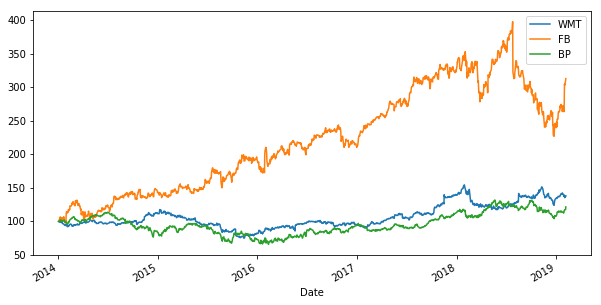

In [5]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))

In [6]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [7]:
log_returns.mean() * 250

WMT    0.062771
FB     0.222590
BP     0.038022
dtype: float64

In [8]:
log_returns.cov() * 250

,WMT,FB,BP
WMT,0.037114,0.008769,0.007187
FB,0.008769,0.091893,0.017422
BP,0.007187,0.017422,0.055248


In [9]:
log_returns.corr()

,WMT,FB,BP
WMT,1.000000,0.150148,0.158709
FB,0.150148,1.000000,0.244516
BP,0.158709,0.244516,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

3

In [12]:
arr = np.random.random(2)
arr

array([ 0.72742423,  0.29305369])

In [13]:
arr[0] + arr[1]

1.0204779193407711

In [14]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.24425776,  0.21216654,  0.5435757 ])

In [15]:
weights[0] + weights[1] + weights[2]

1.0

Expected Portfolio Return:

In [16]:
np.sum(weights * log_returns.mean()) * 250

0.08322614465021623

Expected Portfolio Variance:

In [17]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.029511083529750837

Expected Portfolio Volatility:

In [18]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.17178790274565564

***

In [19]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

pfolio_returns, pfolio_volatilities

([0.12435733115483651,
  0.14025736916671191,
  0.095942349297706966,
  0.17442735172434806,
  0.062935452680634732,
  0.13794103600839835,
  0.1219585136435814,
  0.12724698962852074,
  0.13704334255792092,
  0.12121406313516336,
  0.11188348962450138,
  0.10468111603420799,
  0.16269691636626135,
  0.091819129777638231,
  0.13156859477009422,
  0.084334192449907391,
  0.19840236388813423,
  0.15423154018078061,
  0.050600167772067745,
  0.082196122079796527,
  0.13847945767969089,
  0.20824142641116566,
  0.086245430040274282,
  0.13091155082050598,
  0.11115455583000851,
  0.16097109942712781,
  0.10263130291340344,
  0.12891352809394771,
  0.14853806906467168,
  0.10561086123749167,
  0.077769822338505615,
  0.053412232832669583,
  0.13182806279608539,
  0.10680312112536908,
  0.13585735982374608,
  0.10387966190709713,
  0.11562132499950123,
  0.059756400478585159,
  0.15651375952520935,
  0.10934224336357455,
  0.080321687821204982,
  0.16290299121942806,
  0.079733010155949774,


In [20]:
pfolio_returns = []
pfolio_volatilities = []

for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([ 0.15939759,  0.10255331,  0.06330313,  0.06924821,  0.04571987,
         0.12654813,  0.08363986,  0.10411954,  0.13381   ,  0.10516583,
         0.12872501,  0.15381412,  0.17853351,  0.13420832,  0.07921172,
         0.06304639,  0.08826753,  0.12375109,  0.05608399,  0.12304945,
         0.06823117,  0.06456286,  0.12875776,  0.04658652,  0.07447389,
         0.09763837,  0.13444672,  0.09650143,  0.05259509,  0.0839332 ,
         0.07948984,  0.12446685,  0.09582316,  0.09247902,  0.0918862 ,
         0.11860022,  0.11170921,  0.12562639,  0.13541768,  0.09636888,
         0.14360846,  0.14274045,  0.07745266,  0.13550727,  0.10428608,
         0.07560975,  0.05498244,  0.09277695,  0.06902784,  0.11139071,
         0.0700393 ,  0.06413776,  0.15668915,  0.10909406,  0.12088442,
         0.14179153,  0.13920181,  0.11804289,  0.12693224,  0.07708903,
         0.19289498,  0.09953955,  0.11585514,  0.16433985,  0.08282198,
         0.07891843,  0.11067326,  0.06747473,  0.1

In [21]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [22]:
portfolios.head()

,Return,Volatility
0,0.159398,0.208788
1,0.102553,0.180495
2,0.063303,0.179305
3,0.069248,0.158815
4,0.045720,0.189591


In [23]:
portfolios.tail()

,Return,Volatility
995,0.062658,0.165100
996,0.118965,0.178004
997,0.115027,0.171317
998,0.086903,0.162365
999,0.095011,0.162807


Text(0,0.5,'Expected Return')

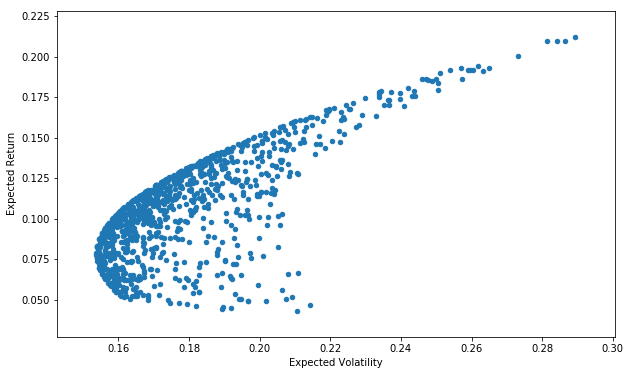

In [24]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')